In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
df = pd.read_csv("../../data/interim/courses.csv", index_col=0, sep=",")
df.head()

c:\Info\KLAP\horse races prediction\env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (31,32,42,43,45,49,50,51,52,53,54,57,58,59,62,63,64,67,68,69,70,71,73,76,77,78,80,83,84,85,87,90,91,92,94,97,98,99,101,104,105,106,108,111,112,113,115,118,119,120,122,125,126,127,129,132,133,134,136,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fieldQuality,sexCategory,raceCategory,raceType,raceSecondType,price_total,distance,fieldType,ropeSide,fieldName,humanDescription,startType,raceScheduledStartEpochMs,raceNumber,reunionNumber,hippodromeName,raceName,pays,photoFinishes_0_url,genyId,raceId,name_race,epreuve,categoryHandicap,handicapRef_0,handicapRef_1,photoFinishes_1_height,photoFinishes_1_width,photoFinishes_1_originalSize,photoFinishes_1_url,photoFinishes_1_description,raceArrival,raceGeoRange,apprentis,recul_distance,recul_value,european,jockeyCategory,challengeName,photoFinishes_0_height,photoFinishes_0_width,photoFinishes_0_originalSize,photoFinishes_0_description,penetrometer,maiden,duration,price_first,price_fifth,ageCategory,ecuries_0_ecurieId,breedCategory,ecuries_1_ecurieId,ecuries_2_ecurieId,ecuries_3_ecurieId,photoFinishes_2_height,photoFinishes_2_width,photoFinishes_2_url,photoFinishes_2_originalSize,photoFinishes_3_url,photoFinishes_4_height,photoFinishes_4_width,photoFinishes_4_originalSize,photoFinishes_4_url,photoFinishes_4_description,photoFinishes_3_height,photoFinishes_3_width,photoFinishes_3_originalSize,photoFinishes_3_description,ecuries_4_ecurieId,feeOnly,ecuries_0_odds_pmu_lastDirect_typeBet,ecuries_0_odds_pmu_lastDirect_ratio,ecuries_0_odds_pmu_lastDirect_typeRatio,ecuries_0_odds_pmu_lastDirect_tendancyNumber,ecuries_0_odds_pmu_lastDirect_epochMs,ecuries_0_odds_pmu_lastDirect_favorite,ecuries_0_odds_pmu_lastDirect_grossePrise,ecuries_0_odds_pmu_lastReference_typeBet,ecuries_0_odds_pmu_lastReference_ratio,ecuries_0_odds_pmu_lastReference_typeRatio,ecuries_0_odds_pmu_lastReference_tendancyNumber,ecuries_0_odds_pmu_lastReference_epochMs,ecuries_0_odds_pmu_lastReference_favorite,ecuries_0_odds_pmu_lastReference_grossePrise,ecuries_1_odds_pmu_lastDirect_typeBet,ecuries_1_odds_pmu_lastDirect_ratio,ecuries_1_odds_pmu_lastDirect_typeRatio,ecuries_1_odds_pmu_lastDirect_tendancyNumber,ecuries_1_odds_pmu_lastDirect_epochMs,ecuries_1_odds_pmu_lastDirect_favorite,ecuries_1_odds_pmu_lastDirect_grossePrise,ecuries_1_odds_pmu_lastReference_typeBet,ecuries_1_odds_pmu_lastReference_ratio,ecuries_1_odds_pmu_lastReference_typeRatio,ecuries_1_odds_pmu_lastReference_tendancyNumber,ecuries_1_odds_pmu_lastReference_epochMs,ecuries_1_odds_pmu_lastReference_favorite,ecuries_1_odds_pmu_lastReference_grossePrise,ecuries_2_odds_pmu_lastDirect_typeBet,ecuries_2_odds_pmu_lastDirect_ratio,ecuries_2_odds_pmu_lastDirect_typeRatio,ecuries_2_odds_pmu_lastDirect_tendancyNumber,ecuries_2_odds_pmu_lastDirect_epochMs,ecuries_2_odds_pmu_lastDirect_favorite,ecuries_2_odds_pmu_lastDirect_grossePrise,ecuries_2_odds_pmu_lastReference_typeBet,ecuries_2_odds_pmu_lastReference_ratio,ecuries_2_odds_pmu_lastReference_typeRatio,ecuries_2_odds_pmu_lastReference_tendancyNumber,ecuries_2_odds_pmu_lastReference_epochMs,ecuries_2_odds_pmu_lastReference_favorite,ecuries_2_odds_pmu_lastReference_grossePrise,ecuries_3_odds_pmu_lastDirect_typeBet,ecuries_3_odds_pmu_lastDirect_ratio,ecuries_3_odds_pmu_lastDirect_typeRatio,ecuries_3_odds_pmu_lastDirect_tendancyNumber,ecuries_3_odds_pmu_lastDirect_epochMs,ecuries_3_odds_pmu_lastDirect_favorite,ecuries_3_odds_pmu_lastDirect_grossePrise,ecuries_3_odds_pmu_lastReference_typeBet,ecuries_3_odds_pmu_lastReference_ratio,ecuries_3_odds_pmu_lastReference_typeRatio,ecuries_3_odds_pmu_lastReference_tendancyNumber,ecuries_3_odds_pmu_lastReference_epochMs,ecuries_3_odds_pmu_lastReference_favorite,ecuries_3_odds_pmu_lastReference_grossePrise,ecuries_4_odds_pmu_lastDirect_typeBet,ecuries_4_odds_pmu_lastDirect_ratio,ecuries_4_odds_pmu_lastDirect_typeRatio,ecuries_4_odds_pmu_lastDirect_tendancyNumber,ecuries_4_odds_pmu_lastDirect_epochMs,ecuries_4_odds_pmu_lastDirect_favorite,ecuries_4_odds_pmu_lastDirect_grossePrise,ecuries_4_odds_pmu_lastReference_typeBet,ecuries_4_odds_pmu_lastReference_ratio,ecuries_4_odds_pmu_lastReference_typeRatio,ecuries_4_odds_pmu_lastReference_tendancyNumber,ecuries_4_odds_pmu_lastReference_epochMs,ecuries_4_odds_pmu_lastReference_favorite

In [5]:
df.dtypes

fieldQuality                                        object
sexCategory                                         object
raceCategory                                        object
raceType                                            object
raceSecondType                                      object
price_total                                        float64
distance                                             int64
fieldType                                           object
ropeSide                                            object
fieldName                                           object
humanDescription                                    object
startType                                           object
raceScheduledStartEpochMs                            int64
raceNumber                                           int64
reunionNumber                                        int64
hippodromeName                                      object
raceName                                            obje

In [6]:
mask = (df.count() >= 20000)
print(f'Sélection de {np.sum(mask)} colonnes')
filter = [column for i, column in enumerate(df.columns.to_list()) if mask[i] and not("photo" in column)]
df = df[filter]
df.info()

Sélection de 48 colonnes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 138950 entries, 0 to 138949
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fieldQuality               138950 non-null  object 
 1   sexCategory                116977 non-null  object 
 2   raceCategory               138950 non-null  object 
 3   raceType                   136611 non-null  object 
 4   raceSecondType             61233 non-null   object 
 5   price_total                138943 non-null  float64
 6   distance                   138950 non-null  int64  
 7   fieldType                  138950 non-null  object 
 8   ropeSide                   137837 non-null  object 
 9   fieldName                  29819 non-null   object 
 10  humanDescription           138791 non-null  object 
 11  startType                  138950 non-null  object 
 12  raceScheduledStartEpochMs  138950 non-null  int64  
 13  race

In [7]:
df.head()

,fieldQuality,sexCategory,raceCategory,raceType,raceSecondType,price_total,distance,fieldType,ropeSide,fieldName,humanDescription,startType,raceScheduledStartEpochMs,raceNumber,reunionNumber,hippodromeName,raceName,pays,genyId,raceId,name_race,categoryHandicap,recul_distance,recul_value,penetrometer,duration,price_first,price_fifth,ageCategory,ecuries_0_ecurieId
0,GOOD,M,GALOP,CLASS_F,A_CONDITIONS,24000.0,1600,TURF,RIGHT,Moyenne piste,"Pour poulains entiers et hongres de 2 ans, n'a...",UNKNOWN,1284809700000,1,1,LONGCHAMP,PRIX DE FONTENOY,FRA,312873.0,geny:312873,2010-09-18_R1C1_PRIX DE FONTENOY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GOOD,F,GALOP,CLASS_F,A_CONDITIONS,24000.0,1600,TURF,RIGHT,Moyenne piste,"Pour pouliches de 2 ans, n'ayant jamais couru....",UNKNOWN,1284811500000,2,1,LONGCHAMP,PRIX DE LA CASCADE,FRA,312874.0,geny:312874,2010-09-18_R1C2_PRIX DE LA CASCADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GOOD,M,GALOP,GROUPE_III,NaN,80000.0,1600,TURF,RIGHT,Moyenne piste,"Pour poulains entiers et hongres de 2 ans, n'a...",UNKNOWN,1284813300000,3,1,LONGCHAMP,PRIX DES CHENES,FRA,312875.0,geny:312875,2010-09-18_R1C3_PRIX DES CHENES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GOOD,NaN,GALOP,CLASS_D,HANDICAP,48000.0,2000,TURF,RIGHT,Grande piste,"Pour chevaux entiers, hongres et juments de 4 ...",UNKNOWN,1284815280000,4,1,LONGCHAMP,PRIX DE LA TABLE,FRA,312876.0,geny:312876,2010-09-18_R1C4_PRIX DE LA TABLE,HANDICAP_DIVIDED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GOOD,NaN,GALOP,GROUPE_III,NaN,80000.0,2000,TURF,RIGHT,Grande piste,"Pour poulains entiers, hongres et pouliches de...",UNKNOWN,1284817500000,5,1,LONGCHAMP,PRIX DU PRINCE D'ORANGE,FRA,312877.0,geny:312877,2010-09-18_R1C5_PRIX DU PRINCE D'ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,price_total,distance,raceScheduledStartEpochMs,raceNumber,reunionNumber,genyId,recul_distance,recul_value,penetrometer,duration,price_first,price_fifth
count,1.389430e+05,138950.000000,1.389500e+05,138950.000000,138950.000000,1.385350e+05,24287.000000,23225.000000,38772.000000,1.060310e+05,1.076870e+05,107687.000000
mean,3.378474e+04,2413.007837,1.441640e+12,4.495775,3.704577,7.374903e+05,22.760324,60592.354360,3.210675,1.742366e+05,1.167680e+04,1161.507248
std,1.359588e+05,717.476098,8.071482e+10,2.358442,2.530531,2.295566e+05,10.360181,72436.897462,2.088520,6.330885e+04,3.502693e+04,2138.147832
min,1.000000e+00,800.000000,1.284804e+12,1.000000,1.000000,2.723260e+05,-50.000000,36.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.300000e+04,2000.000000,1.376570e+12,2.000000,2.000000,5.408065e+05,25.000000,21500.000000,3.000000,1.263300e+05,5.400000e+03,550.000000
50%,2.000000e+04,2400.000000,1.445089e+12,4.000000,3.000000,7.578300e+05,25.000000,42000.000000,3.400000,1.780100e+05,8.640000e+03,900.000000
75%,2.900000e+04,2850.000000,1.510488e+12,6.000000,5.000000,9.408425e+05,25.000000,73000.000000,3.800000,2.154200e+05,1.250000e+04,1250.000000
max,1.386022e+07,7300.000000,1.577819e+12,12.000000,18.000000,1.119290e+06,50.000000,945000.000000,240.000000,1.812750e+06,4.547520e+06,227376.000000


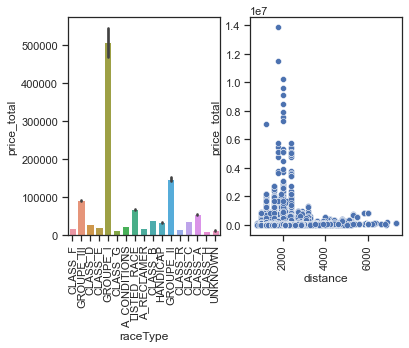

In [12]:
sn.set(style="ticks")
fig, axs = plt.subplots(1, 2)
sn.barplot(data=df, x="raceType", y="price_total", ax=axs[0])
axs[0].tick_params('x', labelrotation=90)
sn.scatterplot(data=df, x="distance", y="price_total", ax=axs[1])
plt.xticks(rotation=90)
plt.close(2)
plt.close(3)